# Import Required Libraries
This section imports all necessary Python libraries for data analysis and visualization, such as pandas, numpy, and matplotlib.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Experiment Results
Load the results data from 'results/template_experiment_2025-06-18_14-38-38/combined_data.csv' into a pandas DataFrame.

In [2]:
# Load experiment results
data_path = '../results/template_experiment_2025-06-18_14-38-38/combined_data.csv'
df = pd.read_csv(data_path)
df

,codec,crf,resolution,video_name,preset,bitrate_kbps,vmaf
0,libx264,18,1080p,Debugging_1080p,medium,1109.586,91.843157
1,libx264,28,1080p,Debugging_1080p,medium,1124.431,91.932582
2,libx264,48,1080p,Debugging_1080p,medium,1118.163,91.846747
3,libx265,22,1080p,Debugging_1080p,medium,1987.102,96.223672
4,libx265,28,1080p,Debugging_1080p,medium,1304.551,93.794732
5,libx265,34,1080p,Debugging_1080p,medium,782.874,87.179087


# Visualization: Rate-Distortion (RD) Curve
This section visualizes the Rate-Distortion curve (e.g., VMAF vs. Bitrate) for different codecs and presets, similar to the template notebook.

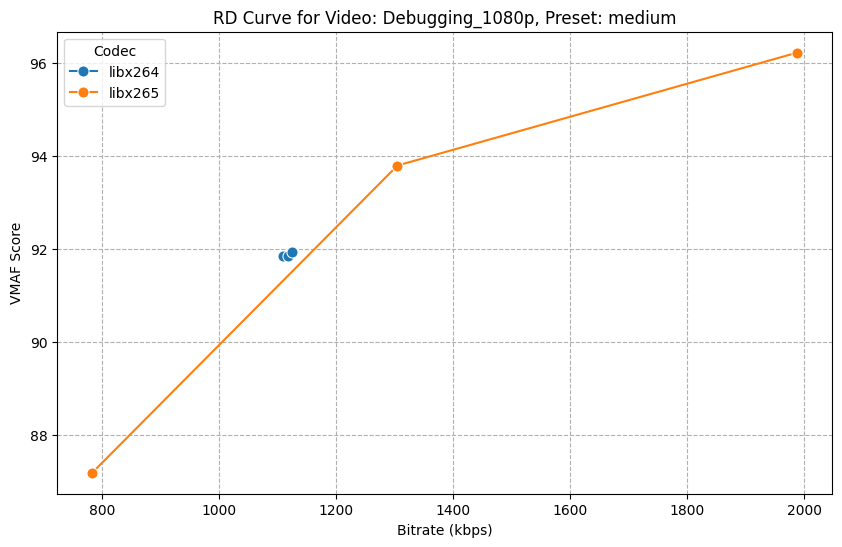

In [3]:
# Plot RD curves for each video_name and preset, showing all codecs
if 'video_name' in df.columns and 'preset' in df.columns:
    for video in df['video_name'].unique():
        for preset in df['preset'].unique():
            subset = df[(df['video_name'] == video) & (df['preset'] == preset)]
            plt.figure(figsize=(10, 6))
            sns.lineplot(
                data=subset,
                x='bitrate_kbps',
                y='vmaf',
                hue='codec',
                marker='o',
                markersize=8
            )
            plt.title(f'RD Curve for Video: {video}, Preset: {preset}')
            plt.xlabel('Bitrate (kbps)')
            plt.ylabel('VMAF Score')
            plt.legend(title='Codec')
            plt.grid(True, which='both', linestyle='--')
            plt.show()
else:
    print("The DataFrame must contain 'video_name' and 'preset' columns.")